In [1]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download

In [3]:
tables = data_download.get_tables(data_download.get_dataframes())

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [5]:
# datadict = data_download.get_dataframes()
# tables = data_download.get_tables(datadict)

In [16]:
ordinal = tables[0]
categorical = tables[1]

In [105]:
ordinal.head()

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,...,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,193000,0,1,1.0,7,1140,0,0,0,1760,...,0,0,0,0,0,0,0,0,0,1
1,550000,0,1,3.0,8,370,650,0,0,1560,...,0,0,0,0,0,0,0,0,0,0
2,648500,0,1,2.0,8,1390,0,0,0,3300,...,0,0,0,0,0,0,0,0,0,0
3,1445000,0,1,2.0,9,2150,0,0,0,4920,...,0,0,0,0,0,0,0,0,0,0
4,785000,0,1,2.0,8,580,0,0,0,1540,...,0,0,0,0,0,0,0,0,0,0


In [226]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,18,5,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,5,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,5,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,5,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,5,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N


In [166]:
correlations = ordinal.corr()['SalePrice']

In [196]:
high_corrs = correlations.sort_values(ascending = False).head(15)
low_corrs = correlations.sort_values(ascending = True).head(10)

In [197]:
high_corrs

SalePrice           1.000000
BldgGrade           0.625155
SqFtTotLiving       0.600756
SqFt1stFloor        0.352494
BathFullCount       0.336938
SqFtOpenPorch       0.293147
Bedrooms            0.292941
Stories             0.287711
Territorial         0.250041
SqFtFinBasement     0.240641
SqFtTotBasement     0.227445
LakeWashington      0.214934
Bath3qtrCount       0.206773
FinBasementGrade    0.201788
SqFtDeck            0.201664
Name: SalePrice, dtype: float64

In [185]:
low_corrs

Condition             -0.065275
FpFreestanding        -0.061528
SqFtUnfinFull          0.002749
SqFtEnclosedPorch      0.004030
TrafficNoise           0.004827
SqFtUnfinHalf          0.006446
NbrLivingUnits         0.009405
MtRainier              0.021947
SmallLakeRiverCreek    0.039506
WfntFootage            0.046074
Name: SalePrice, dtype: float64

In [186]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

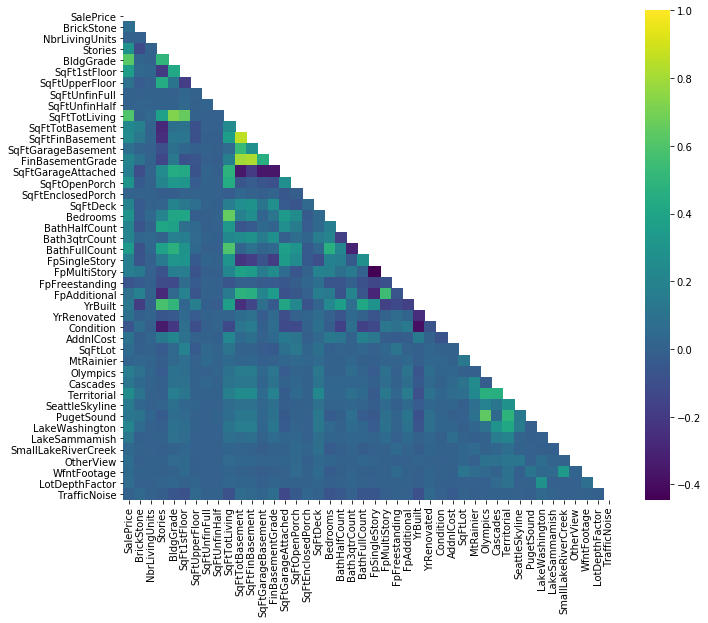

In [187]:
corr = ordinal.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

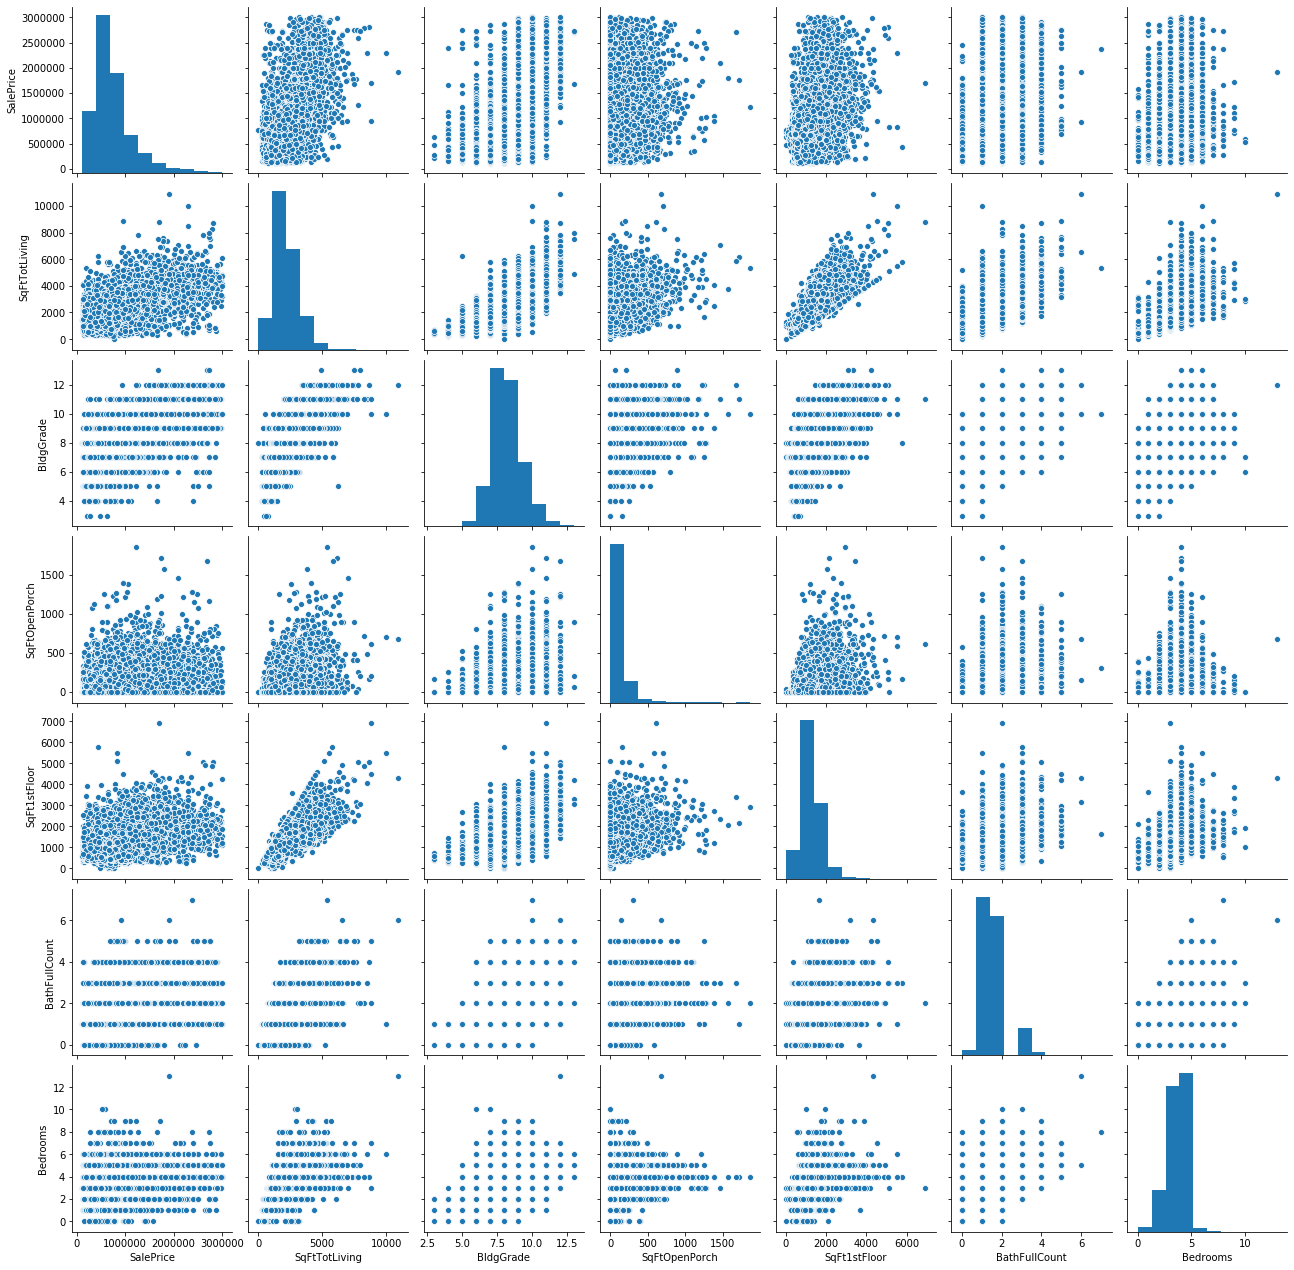

In [209]:
positively_correlated_cols = ['SalePrice','SqFtTotLiving', 'BldgGrade','SqFtOpenPorch', 'SqFt1stFloor', 'BathFullCount', 'Bedrooms']
positively_correlated_df = ordinal[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE

In [136]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=10)
select = select.fit(X = ordinal.drop('SalePrice', axis=1), y = ordinal['SalePrice'])

select.support_

#select.ranking_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False, False])

In [137]:
predictors = ordinal[ordinal.columns[[True] + list(select.support_) ]]

In [138]:
preds = str(predictors.columns[1])
for pred in predictors.columns[2:]:
    preds = preds + f' + {pred}'
preds

'BldgGrade + Bath3qtrCount + BathFullCount + Olympics + SeattleSkyline + PugetSound + LakeWashington + LakeSammamish + SmallLakeRiverCreek + OtherView'

In [104]:
# model = smf.ols(formula = formula, data = preds).fit()
# model.summary()

In [210]:
formula = 'SalePrice ~ BldgGrade'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:34:28   Log-Likelihood:            -3.9475e+05
No. Observations:               27924   AIC:                         7.895e+05
Df Residuals:                   27922   BIC:                         7.895e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.068e+06   1.38e+04    -77.324      0.000    -1.1e+06   -1.04e+06
BldgGrade    2.37e+05   1771.126    133.840      0.000    2.34e+05    2.41e+05
==============================================================================
Omnibus:                     8751.934   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36017.594
Skew:                           1.506   Prob(JB):                         0.00
Kurtosis:                       7.678   Cond. No.                         54.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
formula = 'SalePrice ~ BldgGrade + Condition + Bedrooms + BathFullCount  + Bath3qtrCount + FinBasementGrade  + SqFtOpenPorch'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     3018.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:31:33   Log-Likelihood:            -3.9380e+05
No. Observations:               27924   AIC:                         7.876e+05
Df Residuals:                   27916   BIC:                         7.877e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.092e+06   1.92e+04    -56.982      0.000   -1.13e+06   -1.05e+06
BldgGrade         2.021e+05   2192.849     92.182      0.000    1.98e+05    2.06e+05
Condition          4.04e+04   2903.010     13.915      0.000    3.47e+04    4.61e+04
Bedrooms         -1.499e+04   2575.415     -5.820      0.000      -2e+04   -9939.778
BathFullCount     6.365e+04   3996.306     15.927      0.000    5.58e+04    7.15e+04
Bath3qtrCount     7.287e+04   3808.612     19.134      0.000    6.54e+04    8.03e+04
FinBasementGrade  1.257e+04    571.141     22.014      0.000    1.15e+04    1.37e+04
SqFtOpenPorch      369.4970     17.183     21.503      0.000     335.817     403.177
==============================================================================
Omnibus:                     8731.179   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39580.429
Skew:                           1.467   Prob(JB):                         0.00
Kurtosis:                       8.041   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# SalePrice
# BldgGrade
# SqFtTotLiving
# SqFt1stFloor
# BathFullCount
# SqFtOpenPorch
# Bedrooms
# Stories
# Territorial
# SqFtFinBasement
# SqFtTotBasement   
# Bath3qtrCount       
# FinBasementGrade   
# SqFtDeck            

In [206]:
formula = 'SalePrice ~ BldgGrade + BathFullCount + SqFtOpenPorch + Bedrooms + Stories + SqFtFinBasement + SqFtTotBasement + Condition + SqFtEnclosedPorch'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     2463.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:18:36   Log-Likelihood:            -3.9351e+05
No. Observations:               27924   AIC:                         7.870e+05
Df Residuals:                   27914   BIC:                         7.871e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.161e+06   1.91e+04    -60.855      0.000    -1.2e+06   -1.12e+06
BldgGrade          2.072e+05   2237.878     92.571      0.000    2.03e+05    2.12e+05
BathFullCount      1.954e+04   3357.529      5.820      0.000     1.3e+04    2.61e+04
SqFtOpenPorch       405.1947     16.802     24.115      0.000     372.261     438.128
Bedrooms          -1.145e+04   2447.883     -4.677      0.000   -1.62e+04   -6650.143
Stories            5.188e+04   4603.819     11.268      0.000    4.29e+04    6.09e+04
SqFtFinBasement      32.6531      8.741      3.736      0.000      15.520      49.786
SqFtTotBasement     135.3809      6.604     20.498      0.000     122.436     148.326
Condition          4.276e+04   2988.355     14.310      0.000    3.69e+04    4.86e+04
SqFtEnclosedPorch   158.8996     55.229      2.877      0.004      50.649     267.150
==============================================================================
Omnibus:                     8796.952   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41804.195
Skew:                           1.462   Prob(JB):                         0.00
Kurtosis:                       8.232   Cond. No.                     8.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0724814945539936
Rainbow p-value: 1.7862915647191924e-05


In [ ]:
# Linear regression assumes that the input variable linearly predicts the output variable. 
# We already qualitatively checked that with a scatter plot. 
# But I also think it's a good idea to use a statistical test.
# This one is the Rainbow test which is available from the diagnostic submodule of StatsModels
#The null hypothesis is that the model is linearly predicted by the features, 
# alternative hypothesis is that it is not. 
# Thus returning a low p-value means that the current model violates the linearity assumption.

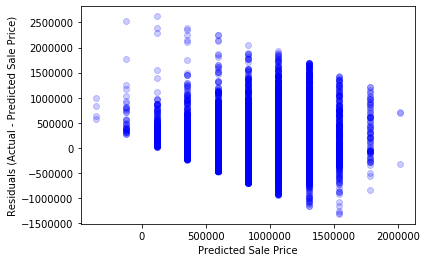

In [214]:
y = ordinal["SalePrice"]
y_hat = model.predict()
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Actual - Predicted Sale Price)")
ax2.scatter(x=y_hat, y=y-y_hat, color="blue", alpha=0.2);

In [ ]:
# Homoscadasticity
# Linear regression assumes that the variance of the dependent variable is homogeneous across different value 
# of the independent variable(s). We can visualize this by looking at the predicted life expectancy 
#vs. the residuals.